This is a logistic regression model to see whether a person is at high risk of heart disease or not

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Mini Projects/Datasets/heart_disease.csv')
print(df)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     0.0   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0

In [4]:
# Replace NaN values with 0
df.fillna(0, inplace=True)

# Save the DataFrame back to CSV file
df.to_csv('/content/drive/MyDrive/Colab Notebooks/ML Mini Projects/Datasets/heart_disease.csv', index=False)

In [5]:
#read df again
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Mini Projects/Datasets/heart_disease.csv')
print(df)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     0.0   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0

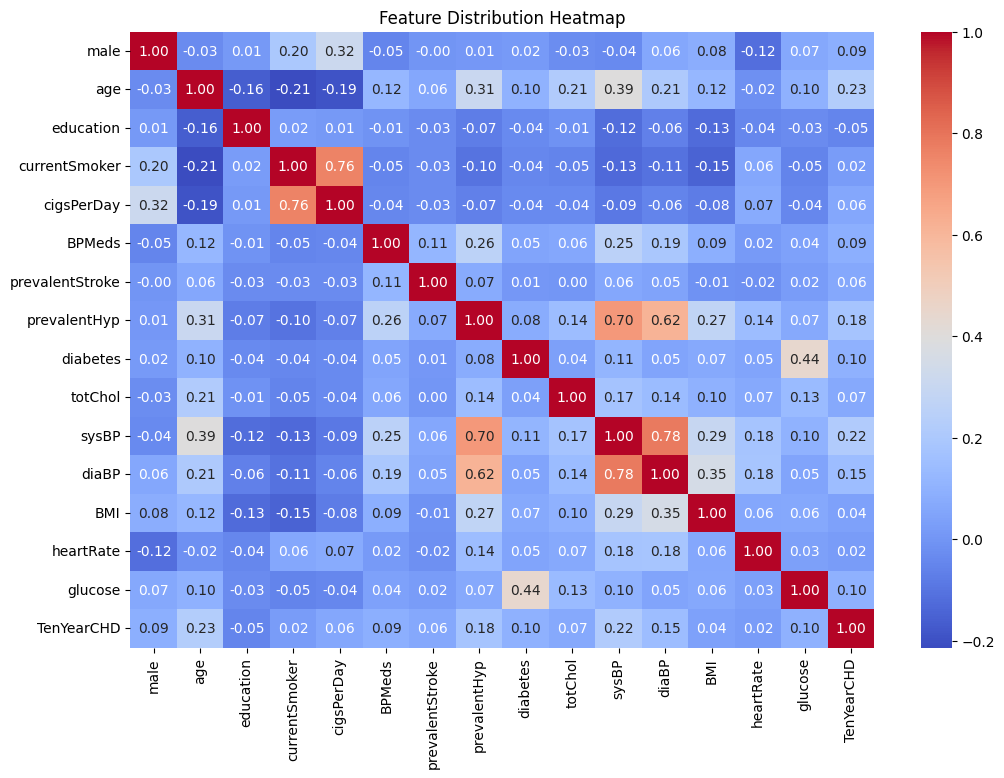

In [9]:
#creating a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Distribution Heatmap')
plt.show()

TenYearCHD is the output here


In [10]:
#now lets take the input rows to numpy arrays
x1 = df['male'].to_numpy()
x2 = df['age'].to_numpy()
x3 = df['education'].to_numpy()
x4 = df['currentSmoker'].to_numpy()
x5 = df['cigsPerDay'].to_numpy()
x6 = df['BPMeds'].to_numpy()
x7 = df['prevalentStroke'].to_numpy()
x8 = df['prevalentHyp'].to_numpy()
x9 = df['diabetes'].to_numpy()
x10 = df['totChol'].to_numpy()
x11 = df['sysBP'].to_numpy()
x12 = df['diaBP'].to_numpy()
x13 = df['BMI'].to_numpy()
x14 = df['heartRate'].to_numpy()
x15 = df['glucose'].to_numpy()
X = np.column_stack((x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15))
y = df['TenYearCHD'].to_numpy()
print(f"X: {X}\n y:{y}")

X: [[  1.    39.     4.   ...  26.97  80.    77.  ]
 [  0.    46.     2.   ...  28.73  95.    76.  ]
 [  1.    48.     1.   ...  25.34  75.    70.  ]
 ...
 [  0.    48.     2.   ...  22.    84.    86.  ]
 [  0.    44.     1.   ...  19.16  86.     0.  ]
 [  0.    52.     2.   ...  21.47  80.   107.  ]]
 y:[0 0 0 ... 0 0 0]


In [13]:
#creating a function to calculate sigmoid function
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [25]:
#creating a loss function
def cost_function(X,y,w,b):
  m = X.shape[0]
  cost = 0
  for i in range(m):
    z = np.dot(w,X[i]) + b
    f = sigmoid(z)
    # Clip the values to avoid log(0) issues
    f = np.clip(f, 1e-10, 1 - 1e-10)
    cost = -y[i]*np.log(f) - (1-y[i])*np.log(1-f)
  total_cost = (1/m)*cost
  return total_cost

In [26]:
#function for finding derivates in gradient descent (dj_db, dj_dw)
def derive(X,y,w,b):
  m = X.shape[0]
  n = w.shape[0]
  dj_db = 0
  dj_dw = np.zeros(n)
  for i in range(m):
    z = np.dot(w,X[i]) + b
    f = sigmoid(z)
    for j in range(n):
      dj_dw[j] += (f-y[i])*X[i][j]
    dj_db += (f-y[i])

  dj_db /= m
  dj_dw /= m

  return dj_dw, dj_db

In [23]:
#creeating gradient descent
def gradient_descent(X,y,w,b,alpha,iterations):
  costs = []
  n = w.shape[0]
  for i in range(iterations):
    dj_dw, dj_db = derive(X,y,w,b)
    #update parameters
    for j in range(n):
      w[j] = w[j] - (alpha*dj_dw[j])
    b = b - (alpha*dj_db)


    if i % 100 == 0:
      cost = cost_function(X, y, w, b)
      costs.append(cost)
      print(f"Iteration {i}: Cost {cost}")

  return w, b, costs

Iteration 0: Cost 2.3596037819499078e-14
Iteration 100: Cost 2.3596037819499078e-14
Iteration 200: Cost 2.3596037819499078e-14
Iteration 300: Cost 2.3596037819499078e-14
Iteration 400: Cost 4.264373592090641e-12
Iteration 500: Cost 0.0010186959255284182
Iteration 600: Cost 1.5182777420072267e-07
Iteration 700: Cost 2.3596037819499078e-14
Iteration 800: Cost 3.2178915818577177e-14
Iteration 900: Cost 2.3596037819499078e-14


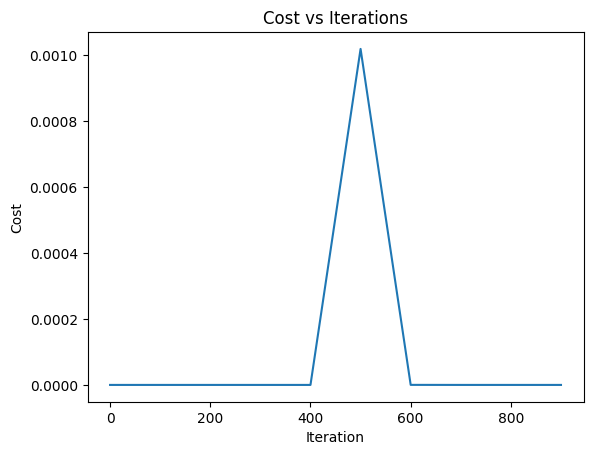

Final weights: [ 0.00904049  0.1151149  -0.02818692 -0.00196664  0.09209603  0.00378954
  0.00143742  0.01911202  0.00390824 -0.06858402  0.1148835  -0.13976374
 -0.12680463 -0.17160711  0.01223688]
Final bias: 0


In [28]:
m = X.shape[1]
w = np.zeros(m)
b = 0
alpha = 0.001
iterations = 1000
w_final, b_final, costs = gradient_descent(X,y,w,b,alpha,iterations)
plt.plot(range(0,iterations,100),costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()
print("Final weights:", w)
print("Final bias:", b)

In [31]:
#prediction
x_predict = [1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0]
z = np.dot(w_final,x_predict) + b_final
f = sigmoid(z)
if f>0.5:
  print("High risk of heart disease")
elif f<0.5:
  print("Low risk of heart disease")

Low risk of heart disease
